C:\Users\Fnac\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Fnac\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


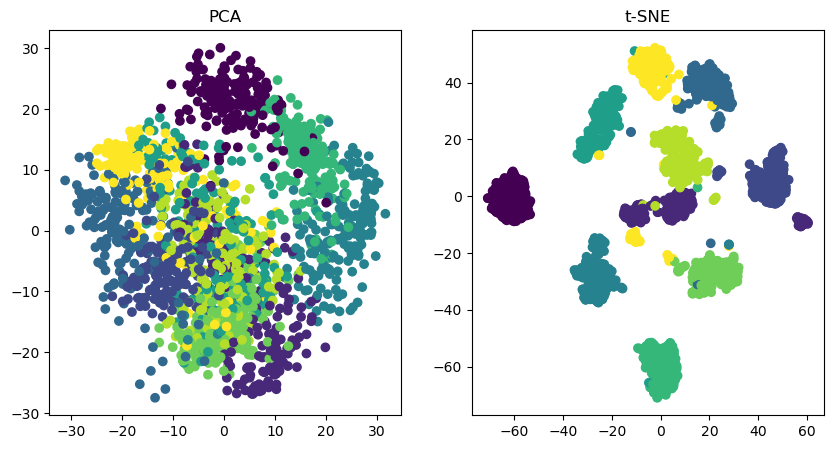

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def reduce_dimensions(data, method="pca", n_components=None, perplexity=None):
    """
    Reduces the number of dimensions in the input data using the specified method.
    
    Args:
        data (pandas.DataFrame or numpy.ndarray): The input data to be transformed.
        method (str): The method to use for dimensionality reduction. Default is "pca".
        n_components (int or None): The number of components to keep. Only applicable for "pca" and "ica".
                                    If None, all components are kept. Default is None.
        perplexity (float or None): The perplexity parameter for t-SNE. Only applicable for "tsne".
                                    If None, the default value is used. Default is None.
    
    Returns:
        The transformed data.
    """
    
    if isinstance(data, pd.DataFrame):
        X = data.values
    else:
        X = data
    
    if method == "pca":
        pca = PCA(n_components=n_components)
        X_transformed = pca.fit_transform(X)
    elif method == "tsne":
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_transformed = tsne.fit_transform(X)
    else:
        raise ValueError("Invalid method specified. Valid options are 'pca' and 'tsne'.")
    
    return X_transformed


# Load the digits dataset
digits = load_digits()

# Apply dimensionality reduction using PCA
X_pca = reduce_dimensions(digits.data, method="pca", n_components=2)

# Apply dimensionality reduction using t-SNE
X_tsne = reduce_dimensions(digits.data, method="tsne", perplexity=30)

# Display the reduced data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)
ax[0].set_title("PCA")
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target)
ax[1].set_title("t-SNE")

plt.show()
